# Status of the Thalamus Corpus

This notebook compute and display some useful information about the status of the thalamus corpus.

In [1]:
## Installation of the Neuro Annotation Toolbox (NAT)
#!pip3 install -q --upgrade  git+https://github.com/BlueBrain/nat.git --user #--force-reinstall
    
## Installation of other standard toolboxes
!pip3 install -q matplotlib seaborn --user

In [2]:
## Downloading the Thalamus corpus
from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()

In [3]:
from glob import glob

from nat.annotation import Annotation
from nat.treeData import flatten_list

annotations = []
for fileName in glob(repo_dir + "/*.pcr"):
    try:
        annotations.extend(Annotation.readIn(open(fileName, "r", encoding="utf-8", errors='ignore')))
    except:       
        print("Skipping: ", fileName)    
        raise

In [4]:
import pandas as pd
import numpy as np

pd.DataFrame({"Nb. annotations" : [len(annotations)],
              "Nb. papers"      : [len(np.unique([annot.pubId for annot in annotations]))],
              "Nb. parameters"  : [len(flatten_list([[(param, annot) for param in annot.parameters]  
                                                     for annot in annotations]))]})

,Nb. annotations,Nb. papers,Nb. parameters
0,509,97,435


In [5]:
parameters = flatten_list([annot.parameters for annot in annotations])

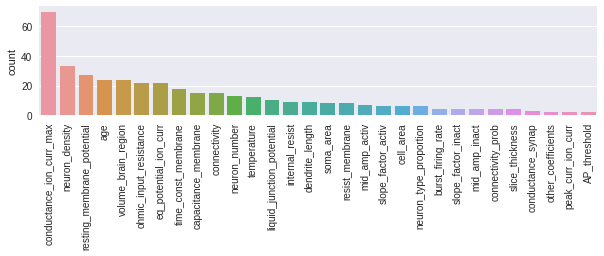

In [6]:
%matplotlib inline
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from nat.modelingParameter import getParameterTypeNameFromID

plt.figure(figsize=(10, 2))

paramTypes = pd.Series([param.typeId for param in parameters])

axes = sb.countplot(paramTypes, orient='h',
                    order=paramTypes.value_counts().iloc[:30].index)

#plt.xticks(plt.xticks(), plt.gca().get_xticklabels(), rotation='vertical')
paramNames = [getParameterTypeNameFromID(typeId.get_text()) for typeId in axes.get_xticklabels()]
axes.set_xticklabels(paramNames, rotation='vertical')
pass

plt.savefig("annotatedParamHist.png", bbox_inches='tight', dpi=300)

### Printing information for the most annotated parameters

In [8]:
from nat.annotationSearch import ParameterSearch, ConditionAtom

parameters = flatten_list([annot.parameters for annot in annotations])        
paramTypes = pd.Series([param.typeId for param in parameters])
paramNames = [getParameterTypeNameFromID(typeId) for typeId in paramTypes.value_counts().iloc[:5].index]

for paramName in paramNames:
    print("PARAMETER NAME:", paramName)
    searcher = ParameterSearch(repo_dir)
    searcher.setSearchConditions(ConditionAtom("Parameter name", paramName))
    searcher.expandRequiredTags = True
    searcher.onlyCentralTendancy = False
    searcher.contextLength       = 200
    resultDF = searcher.search()
    no = 0
    for _, row in resultDF.iterrows():
        if row["obj_annotation"].type == "text":
            no += 1
            print("Number: ", no)
            print("Text: ", row["Text"].replace("\n", " "))
            print("Context: ", row["Context"].replace("\n", " "))
            print("Values: ", row["Values"])
            print("Unit: ", row["Unit"])
            print(" ")

PARAMETER NAME: conductance_ion_curr_max
Number:  1
Text:  The gKIR and the fast voltage-gated potassium channel ( gKf) had conductances of 20 s/ cm2 and 50 mS/cm2, respectively. Both potassium channels had reversal potentials of 100 mV.
Context:  of 150 ␮s/cm 2. T-type Ca2ϩ channels ( gT) were modeled with a reversal potential of 120 mV and a permeability of 0.7 ␮m/s. The gCAN had a conductance of 250 ␮S/cm 2 and reversal potential of Ϫ20 mV. The gKIR and the fast voltage-gated potassium channel ( gKf) had conductances of 20 ␮s/ cm 2 and 50 mS/cm 2, respectively. Both potassium channels had reversal potentials of Ϫ100 mV. The gNa had conductance of 50 mS/cm 2 and reversal potential of 50 mV. Throughout this manuscript, when referring to the ability of gT to provide current, we use the term “conductance” rather than
Values:  20.0
Unit:  uS/cm^2
 
Number:  2
Text:  The gKIR and the fast voltage-gated potassium channel ( gKf) had conductances of 20 s/ cm2 and 50 mS/cm2, respectively. B

Number:  1
Text:  The total volume of this part of vibrissal thalamus (i.e., convex hull around 24 barreloids; Materials and Methods) was 0.19 ± 0.03 mm 3 , resulting in an average neuron density across the entire VPM of 52,494 ± 5,082 mm −3 . Densities in VPM within and above/below barreloids (51,507 ± 4,422 and 54,440 ± 6,559 mm −3 , respectively) were larger compared with the sur- rounding thalamic nuclei, with 49,680 ± 1,097 and 41,477 ± 3,612mm −3 in nucleus reticularis (RT) and posterior medial nucleus (POm), respectively. 
Context:  vibrissal thalamus was 9,963 ± 718. As for the vibrissal cortex, the variability in neuron numbers across animals was small (7.2%). All neurons in VPM thalamus were excitatory (i.e., GAD67 negative). The total volume of this part of vibrissal thalamus (i.e., convex hull around 24 barreloids; Materials and Methods) was 0.19 ± 0.03 mm3, resulting in an average neuron density across the entire VPM of 52,494 ± 5,082 mm−3. Densities in VPM within and abov

Number:  1
Text:  The resting potential of the relay cells 71.4 +/- 3.1 mV, and that of the interneurons was 69.1+/-  3.6 mV.
Context:  brane timeconstant (101.2&19.3 vs 22.5&7.1 MD). These characteristics alone were sufficient to distinguish unambiguously the two cell types prior to subsequent morphological confirmation (see below). The resting potential of the relay cells "71.4&3.1 mV, and that of the interneurons was "69.1&3.6 mV. The morphology of nine relay cells and all 11 interneurons was recovered in subsequent histological processing, and in each case, the physiologicallydetermined classification was confirmed (cf. Refs 11, 14
Values:  -69.1 +/- 3.6  (n=11.0)
Unit:  mV
 
Number:  2
Text:  Measurements of these responses revealed that input resistance (55  19M; n  94), resting membrane potential (60  4 mV; n  67), and spike amplitude (64  7mV; n  80) 
Context:  rane properties of LPN cells The voltage responses to square-wave current pulses were used to explore the pass

Number:  1
Text:  Wistar rats (aged 28–29 d)
Context:  n Animal Welfare Act and approved by the Institutional Animal Care and Use Committee of the Max Planck Florida Institute for Neuroscience. Histology was conducted as reported previously (24). Brieﬂy, Wistar rats (aged 28–29 d) were perfused transcardially, and brains were removed and ﬁxed with paraformaldehyde. For neuron counting in cortex, 43–48 consecutive Vibratome sections of 50 μm thickness were cut tangentially to v
Values:    [28.0 - 29.0] 
Unit:  day
 
Number:  2
Text:  Sprague-Dawley rats (postnatal days 7-12)
Context:   in a sustainedreleaseof GABA onto TCs. Portions  of these results have been published  in preliminary  form (Huguenard and Prince, 1991). Materials and Methods Tissuesliceandisolatedcellpreparation. Sprague-Dawley rats (postnatal days 7-12) were deeply anesthetized with pentobarbital(50 mg/kg) and decapitated, and the brain was rapidly removed and placed in chilled oxygenated Ringer’s solution. Coronal sl

Number:  1
Text:  As measured with Cavalieri’s method, the respective volumes of DLG, PF, and Rt were 0.82 +/- 0.06, 0.25 +/- 0.02, and 0.76 +/- 0.11 mm^3
Context:  f ﬁbers en passage, were seen in DLG and Rt, but not in PF. In transverse sections of DLG, some of these relatively thick, nonvaricose ﬁbers could be followed across the entire extent of the nucleus. As measured with Cavalieri’s method, the respective volumes of DLG, PF, and Rt were 0.82 Ϯ 0.06, 0.25 Ϯ 0.02, and 0.76 Ϯ 0.11 mm3 (PF Ͻ DLG and Rt, P Ͻ 0.01). In cresyl violet-stained sections, the neuronal cell bodies in DLG, PF, and Rt were of comparable size and shape, averaging 15.8 Ϯ 0.7 ␮m in diameter. As estimated with StereoIn
Values:  0.25 +/- 0.76  (n=5.0)
Unit:  mm^3
 
Number:  2
Text:  As measured with Cavalieri’s method, the respective volumes of DLG, PF, and Rt were 0.82 +/- 0.06, 0.25 +/- 0.02, and 0.76 +/- 0.11 mm^3
Context:  f ﬁbers en passage, were seen in DLG and Rt, but not in PF. In transverse sections of D